<h1>Himanshu Singh</h1>

<h3>Data Science and Business Analytics Intern (GRIP July 2021 Batch) @ SPARKS Foundation</h3>

<h3>Task 1 : Prediction Using Supervised ML <br>
Problem : To predict the score of a student based on their studying hours.<br>
Data : http://bit.ly/w-data </h3>

<h4>Importing required libraries.</h4>

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

<h4>Reading data </h4>

In [2]:
url = "http://bit.ly/w-data"
dt= pd.read_csv(url)
print("Data imported successfully")
dt.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h4> Data Analysis</h4>

In [3]:
dt.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
dt.isnull().any()

Hours     False
Scores    False
dtype: bool

<h4>Splitting the Dataset and Scatter plot</h4>

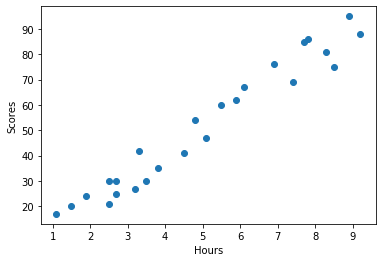

In [7]:
x=dt.iloc[:,:1]
y=dt['Scores']
plt.scatter(x,y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

<h4>Splitting the Dataset into Training and Testing data</h4>

In [8]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [9]:
#No of Entries in each
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (18, 1)
x_test : (7, 1)
y_train : (18,)
y_test : (7,)


<h4>Training</h4>

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

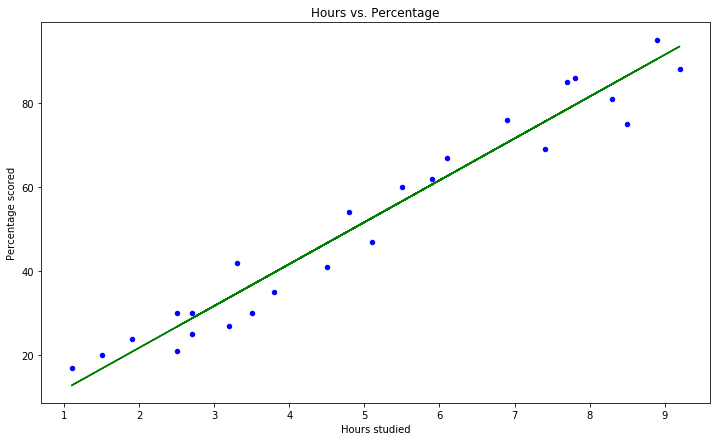

In [11]:
# Plotting the regression line
dt.plot(kind="scatter", x="Hours", y="Scores", figsize=(12,7), color='blue')
line = regressor.coef_[0]*x_train + regressor.intercept_
plt.plot(x_train, line,color='green')
plt.title('Hours vs. Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

<h4>Testing</h4>

In [12]:
y_pred = regressor.predict(x_test) 
print(x_test) 

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9


In [13]:
# Comparing
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df1

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


<h4>Predicting Results for 9.25 study Hours of Student</h4>

In [14]:
t = regressor.predict([[9.25]])
print("The predicted score for the given study hours is:",t)

The predicted score for the given study hours is: [93.89272889]


<h4>Evaluating the Model</h4>

In [15]:
from sklearn import metrics  
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error(MAE): 4.130879918502486
Root Mean Squared Error(RMSE): 4.5092043283688055
